# 1. python实现图片灰度化和二值化

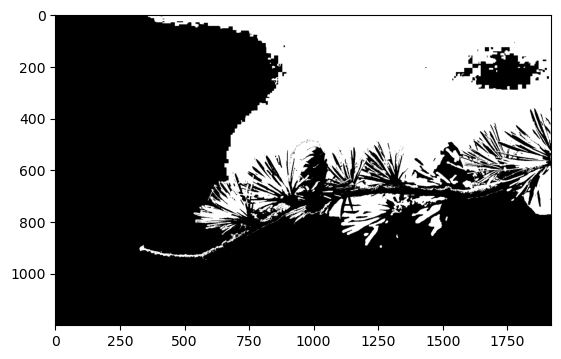

-1

In [5]:
# 导入库
import numpy as np
import matplotlib.pyplot as plt
import cv2

####实现图像的灰度化
# 读取图片
image = cv2.imread("gray_test.jpg")

# 获取图片的高、宽
h, w = image.shape[:2]

# 创建一张和原图片大小一样的单通道图片
image_gray = np.zeros([h, w], image.dtype)
for i in range(h):
    for j in range(w):
        # 取出当前high和wide中的BGR坐标
        m = image[i,j]
        # 将BGR坐标转化为gray坐标并赋值给新图像
        # 浮点算法： Gray= R0.3 + G0.59 + B0.11
        image_gray[i,j] = int(m[0]*0.11 + m[1]*0.59 +m[2]*0.3)
cv2.imshow('image', image)
cv2.imshow('image show gray', image_gray)


####实现图像的二值化
# 创建一张和原图片大小一样的单通道图片
image_binary= np.zeros([h, w], image.dtype)
for i in range(h):
    for j in range(w):
        if image_gray[i, j] <=128:
            image_binary[i, j] = 0
        else:
            image_binary[i, j] = 1
plt.imshow(image_binary, cmap = 'gray') # cmap表示二值是哪二值，gray为黑白
plt.show()
cv2.waitKey(0)

#  2.python实现最近邻插值

In [2]:
def nearest_interp(img):
    # 获取图像的高、宽和颜色通道
    h, w, c = img.shape
    # 创建一个空的图像
    img_near = np.zeros([800, 800, c], np.uint8)
    nh = 800/h
    nw = 800/w
    for i in range(800):
        for j in range(800):
            x = int(i/nh + 0.5)
            y = int(j/nw + 0.5) 
            img_near[i, j] = img[x, y]
    return img_near

In [3]:
# 第一个作业中读取的图像直接赋值给img
img = image
nearinter = nearest_interp(img)
cv2.imshow('nearest interp', nearinter)

# 3.证明双线性插值中心重合

原图像M×M → 目标图像N×N
目标图像在原图像坐标系位置为（x,y)
原图坐标（xm,ym)   m = 0,..., M-1   几何中心(x(M-1)/2,y(M-1)/2)
目标图坐标（xn,yn)  n = 0,..., N-1   几何中心(x(N-1)/2,y(N-1)/2)
x = n*M/N →使几何中心相同 （M-1）/2 +Z = （（N-1）/2 +Z）M/N
Z(1 - M/N) = (N-1)M/2N - (M-1)N/2N
Z*(N-M)/N = N-M/2N
Z = 1/2
可知，使等式两边+1/2即可使几何中心相同。

# 4.python实现双线性插值

In [4]:
# 导入库
import numpy as np
import matplotlib.pyplot as plt
import cv2

def bilinear_interpolation(img,out_dim):
    src_h, src_w, channel = img.shape
    dst_h, dst_w = out_dim[1], out_dim[0]
    print ("src_h, src_w = ", src_h, src_w)
    print ("dst_h, dst_w = ", dst_h, dst_w)
    if src_h == dst_h and src_w == dst_w:
        return img.copy()
    dst_img = np.zeros((dst_h,dst_w,3),dtype=np.uint8)
    scale_x, scale_y = float(src_w) / dst_w, float(src_h) / dst_h
    for i in range(3):
        for dst_y in range(dst_h):
            for dst_x in range(dst_w):
 
                # find the origin x and y coordinates of dst image x and y
                # use geometric center symmetry
                # if use direct way, src_x = dst_x * scale_x
                src_x = (dst_x + 0.5) * scale_x-0.5
                src_y = (dst_y + 0.5) * scale_y-0.5
 
                # find the coordinates of the points which will be used to compute the interpolation
                src_x0 = int(np.floor(src_x))
                src_x1 = min(src_x0 + 1 ,src_w - 1)
                src_y0 = int(np.floor(src_y))
                src_y1 = min(src_y0 + 1, src_h - 1)
 
                # calculate the interpolation
                temp0 = (src_x1 - src_x) * img[src_y0,src_x0,i] + (src_x - src_x0) * img[src_y0,src_x1,i]
                temp1 = (src_x1 - src_x) * img[src_y1,src_x0,i] + (src_x - src_x0) * img[src_y1,src_x1,i]
                dst_img[dst_y,dst_x,i] = int((src_y1 - src_y) * temp0 + (src_y - src_y0) * temp1)
 
    return dst_img
 
 
if __name__ == '__main__':
    img = cv2.imread("gray_test.jpg")
    dst = bilinear_interpolation(img,(700,700))
    cv2.imshow('bilinear interp',dst)
    cv2.waitKey(0)


src_h, src_w =  1200 1920
dst_h, dst_w =  700 700
